In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

# Load the data from the provided Excel file
data_path = "data.xlsx"  # Ganti dengan path file kamu
data_df = pd.read_excel(data_path)

# Display the loaded data
display(data_df.head(10))

# Encode 'Jenis Kelamin'  [Laki laki  = 0, Perenpuan = 1]
label_encoder = LabelEncoder()
data_df['Jenis Kelamin'] = label_encoder.fit_transform(data_df['Jenis Kelamin'])
# Filter the relevant columns for features and labels
X = data_df[['Jenis Kelamin', 'Berat Badan Saat Lahir (kg)', 'Tinggi Badan Saat Lahir (cm)', 
             'Berat Badan Saat Ini (kg)', 'Tinggi Badan Saat Ini (cm)', 'Usia (bulan)', 
             'Z-Score Berat Badan', 'Z-Score Tinggi Badan']].values
y = data_df['Status Gizi'].apply(lambda x: 1 if x == 'Gizi buruk (severely wasted)' else -1).values  # Binary labels

# Display the features and labels
print("Features (X):")
print(X[:10])
print("\nLabels (y):")
print(y[:10])


,Nama,Jenis Kelamin,Berat Badan Saat Lahir (kg),Tinggi Badan Saat Lahir (cm),Berat Badan Saat Ini (kg),Tinggi Badan Saat Ini (cm),Usia (bulan),Z-Score Berat Badan,Z-Score Tinggi Badan,Klasifikasi Z score-TB,Klasifikasi Z score-BB,Status Gizi
0,Child_1,Perempuan,3.293410,51.666901,15.982602,123.513401,44,-0.023480,1.288734,Normal,Gizi Baik,Ideal
1,Child_2,Perempuan,3.136289,48.518154,17.173938,106.108100,47,0.089422,-0.171855,Normal,Gizi Baik,Ideal
2,Child_3,Laki-laki,3.260250,47.846633,22.282495,123.059752,53,0.742796,0.538838,Normal,Gizi Baik,Ideal
3,Child_4,Laki-laki,3.037796,53.348778,1.922509,57.418566,0,-2.754982,1.978570,Normal,Gizi Kurang,Tidak Seimbang
4,Child_5,Laki-laki,3.868164,47.925870,4.475546,66.111807,3,-2.138283,0.889020,Normal,Gizi Kurang,Tidak Seimbang
5,Child_6,Perempuan,2.047900,51.942346,5.288018,123.965482,59,-2.124920,0.199141,Normal,Gizi Kurang,Tidak Seimbang
6,Child_7,Perempuan,4.246474,48.407074,6.272380,51.946568,3,-0.141800,-1.783666,Normal,Gizi Baik,Ideal
7,Child_8,Perempuan,3.159685,46.788455,0.355839,122.696065,39,-3.276480,1.712873,Normal,Gizi Buruk,Gizi Buruk
8,Child_9,Laki-laki,4.337933,52.937312,8.122270,63.953493,9,-0.518487,-0.963262,Normal,Gizi Baik,Ideal
9,Child_10,Perempuan,4.325234,45.713822,10.248192,92.784886,19,-0.340723,1.369088,Normal,Gizi Baik,Ideal


Features (X):
[[ 1.00000000e+00  3.29340978e+00  5.16669014e+01  1.59826024e+01
   1.23513401e+02  4.40000000e+01 -2.34795257e-02  1.28873390e+00]
 [ 1.00000000e+00  3.13628878e+00  4.85181539e+01  1.71739381e+01
   1.06108100e+02  4.70000000e+01  8.94222897e-02 -1.71855176e-01]
 [ 0.00000000e+00  3.26024961e+00  4.78466330e+01  2.22824947e+01
   1.23059752e+02  5.30000000e+01  7.42795713e-01  5.38837684e-01]
 [ 0.00000000e+00  3.03779604e+00  5.33487785e+01  1.92250924e+00
   5.74185665e+01  0.00000000e+00 -2.75498153e+00  1.97857012e+00]
 [ 0.00000000e+00  3.86816421e+00  4.79258698e+01  4.47554556e+00
   6.61118071e+01  3.00000000e+00 -2.13828271e+00  8.89020213e-01]
 [ 1.00000000e+00  2.04790041e+00  5.19423457e+01  5.28801825e+00
   1.23965482e+02  5.90000000e+01 -2.12492027e+00  1.99140953e-01]
 [ 1.00000000e+00  4.24647445e+00  4.84070739e+01  6.27237999e+00
   5.19465683e+01  3.00000000e+00 -1.41800012e-01 -1.78366635e+00]
 [ 1.00000000e+00  3.15968487e+00  4.67884549e+01  3.55

In [30]:
import numpy as np

# Initialize parameters
w = np.zeros(X.shape[1])  # Weight vector
b = 0  # Bias term
learning_rate = 0.001  # Learning rate
n_iters = 1000  # Number of iterations

# Display the initialized parameters
print("Initial weight vector (w):", w)
print("Initial bias (b):", b)
print("Learning rate:", learning_rate)
print("Number of iterations:", n_iters)


Initial weight vector (w): [0. 0. 0. 0. 0. 0. 0. 0.]
Initial bias (b): 0
Learning rate: 0.001
Number of iterations: 1000


In [32]:
# Pastikan X dan y adalah numpy array untuk operasi aritmatika yang benar
X = np.array(X)
y = np.array(y)

# Inisialisasi parameter
w = np.zeros(X.shape[1])  # Vektor bobot
b = 0  # Bias
learning_rate = 0.001  # Learning rate
n_iters = 1000  # Jumlah iterasi
lambda_param = 1 / n_iters  # Parameter regularisasi

# Fungsi untuk menghitung margin
def compute_margin(x_i, y_i, w, b):
    return y_i * (np.dot(w, x_i) + b)

# Proses pelatihan
for epoch in range(1, n_iters + 1):  # Pastikan epoch dimulai dari 1 untuk menghindari pembagian dengan nol
    for i, x_i in enumerate(X):
        margin = compute_margin(x_i, y[i], w, b)  # Hitung margin
        if margin >= 1:  # Jika sampel benar diklasifikasikan
            w -= learning_rate * (2 * lambda_param * w)  # Hanya terapkan regularisasi
        else:  # Jika sampel salah diklasifikasikan
            w += learning_rate * (y[i] * x_i - 2 * lambda_param * w)  # Perbarui bobot
            b += learning_rate * y[i]  # Perbarui bias

    # Cetak perkembangan setiap 100 epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: w = {w}, b = {b}")

# Tampilkan parameter model akhir
print(f"Parameter model akhir: w = {w}, b = {b}")

# Fungsi prediksi
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

# Prediksi pada set pelatihan
predictions = predict(X, w, b)

# Hitung akurasi
accuracy = np.mean(predictions == y)
print(f"Akurasi pelatihan: {accuracy * 100:.2f}%")

Epoch 100: w = [-9.41766361e-04 -3.10162255e-03 -4.86581497e-02 -1.50518773e-02
 -1.16320766e-01 -4.14377199e-02  2.21122275e-05 -1.21368623e-03], b = -0.001
Epoch 200: w = [-8.86922104e-04 -2.92099794e-03 -4.58245169e-02 -1.41753233e-02
 -1.09546766e-01 -3.90245726e-02  2.08245104e-05 -1.14300658e-03], b = -0.001
Epoch 300: w = [-8.35271732e-04 -2.75089209e-03 -4.31559022e-02 -1.33498160e-02
 -1.03167252e-01 -3.67519562e-02  1.96117841e-05 -1.07644299e-03], b = -0.001
Epoch 400: w = [-7.86629246e-04 -2.59069245e-03 -4.06426957e-02 -1.25723824e-02
 -9.71592536e-02 -3.46116868e-02  1.84696816e-05 -1.01375577e-03], b = -0.001
Epoch 500: w = [-7.40819480e-04 -2.43982212e-03 -3.82758470e-02 -1.18402232e-02
 -9.15011336e-02 -3.25960571e-02  1.73940900e-05 -9.54719176e-04], b = -0.001
Epoch 600: w = [-6.97677470e-04 -2.29773781e-03 -3.60468331e-02 -1.11507016e-02
 -8.61725173e-02 -3.06978087e-02  1.63811361e-05 -8.99120605e-04], b = -0.001
Epoch 700: w = [-6.57047858e-04 -2.16392784e-03 -3.3

In [33]:
import pickle

# Simpan model ke dalam file menggunakan pickle
model_path = "svm_model.pkl"
with open(model_path, 'wb') as model_file:
    pickle.dump((w, b), model_file)

# Informasikan bahwa model telah disimpan
print(f"Model telah disimpan ke {model_path}")


Model telah disimpan ke svm_model.pkl


In [34]:
# Membuat 20 data dummy untuk pengujian
data_dummy = pd.DataFrame({
    'Jenis Kelamin': [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1],  # 0 untuk 'L', 1 untuk 'P'
    'Berat Badan Saat Lahir (kg)': [3.5, 2.8, 3.2, 3.0, 3.1, 3.4, 3.3, 2.9, 3.6, 3.1, 3.0, 2.7, 3.4, 3.3, 3.2, 3.5, 3.0, 3.6, 2.9, 3.4],
    'Tinggi Badan Saat Lahir (cm)': [50, 48, 52, 49, 50, 51, 53, 47, 52, 49, 48, 46, 51, 50, 48, 49, 50, 52, 47, 51],
    'Berat Badan Saat Ini (kg)': [7.0, 6.2, 8.0, 7.5, 7.3, 7.8, 7.4, 6.5, 8.2, 7.1, 6.9, 6.0, 7.6, 7.3, 7.0, 7.5, 7.2, 8.0, 6.4, 7.8],
    'Tinggi Badan Saat Ini (cm)': [60, 58, 62, 61, 60, 63, 61, 59, 64, 61, 60, 57, 62, 60, 59, 62, 60, 63, 58, 61],
    'Usia (bulan)': [12, 10, 14, 13, 11, 13, 12, 9, 15, 12, 11, 8, 14, 11, 10, 12, 11, 15, 9, 13],
    'Z-Score Berat Badan': [0.5, -0.5, 1.0, 0.8, 0.7, 0.9, 0.6, -0.3, 1.2, 0.4, 0.2, -0.7, 0.9, 0.6, 0.5, 0.8, 0.3, 1.1, -0.4, 0.7],
    'Z-Score Tinggi Badan': [0.4, -0.3, 0.9, 0.7, 0.5, 0.8, 0.6, -0.4, 1.0, 0.3, 0.1, -0.6, 0.8, 0.5, 0.4, 0.7, 0.2, 0.9, -0.5, 0.6]
})

# Display the dummy data
display(data_dummy)

,Jenis Kelamin,Berat Badan Saat Lahir (kg),Tinggi Badan Saat Lahir (cm),Berat Badan Saat Ini (kg),Tinggi Badan Saat Ini (cm),Usia (bulan),Z-Score Berat Badan,Z-Score Tinggi Badan
0,0,3.5,50,7.0,60,12,0.5,0.4
1,1,2.8,48,6.2,58,10,-0.5,-0.3
2,0,3.2,52,8.0,62,14,1.0,0.9
3,1,3.0,49,7.5,61,13,0.8,0.7
4,1,3.1,50,7.3,60,11,0.7,0.5
5,0,3.4,51,7.8,63,13,0.9,0.8
6,0,3.3,53,7.4,61,12,0.6,0.6
7,1,2.9,47,6.5,59,9,-0.3,-0.4
8,0,3.6,52,8.2,64,15,1.2,1.0
9,1,3.1,49,7.1,61,12,0.4,0.3


In [36]:
# Fungsi prediksi
def predict(X, w, b):
    return np.dot(X, w) + b

# Membaca model yang disimpan
model_path = "svm_model.pkl"
with open(model_path, 'rb') as model_file:
    w, b = pickle.load(model_file)

# Menampilkan parameter model yang dibaca
print(f"Parameter model yang dibaca: w = {w}, b = {b}")

# Memilih fitur yang relevan dari data dummy untuk prediksi
X_dummy = data_dummy[['Jenis Kelamin', 'Berat Badan Saat Lahir (kg)', 
                      'Tinggi Badan Saat Lahir (cm)', 'Berat Badan Saat Ini (kg)', 
                      'Tinggi Badan Saat Ini (cm)', 'Usia (bulan)', 
                      'Z-Score Berat Badan', 'Z-Score Tinggi Badan']].values

# Melakukan prediksi pada data dummy
predictions = predict(X_dummy, w, b)
binary_predictions = np.sign(predictions)  # Konversi prediksi menjadi -1 atau 1

# Print detail prediksi untuk penjelasan
print("Detail Prediksi:")
for i, (x, pred) in enumerate(zip(X_dummy, predictions)):
    print(f"Data {i+1}: {x}")
    print(f"Nilai SVM: {pred}")
    print(f"Status Gizi: {'Gizi buruk (severely wasted)' if binary_predictions[i] == 1 else 'Bukan gizi buruk'}")
    print()

# Menentukan status gizi berdasarkan prediksi
status_gizi_predictions = ['Gizi buruk' if pred == 1 else 'Bukan gizi buruk' for pred in binary_predictions]

# Menambahkan kolom hasil prediksi dan status gizi ke data dummy
data_dummy['Nilai SVM'] = predictions
data_dummy['Prediksi Status Gizi'] = status_gizi_predictions

# Menampilkan hasil prediksi
display(data_dummy)


Parameter model yang dibaca: w = [-5.48812404e-04 -1.80746414e-03 -2.83554364e-02 -8.77145044e-03
 -6.77856867e-02 -2.41477458e-02  1.28858550e-05 -7.07273149e-04], b = -0.001
Detail Prediksi:
Data 1: [ 0.   3.5 50.   7.  60.  12.   0.5  0.4]
Nilai SVM: -5.843688713124268
Status Gizi: Bukan gizi buruk

Data 2: [ 1.   2.8 48.   6.2 58.  10.  -0.5 -0.3]
Nilai SVM: -5.5948951972229715
Status Gizi: Bukan gizi buruk

Data 3: [ 0.   3.2 52.   8.  62.  14.   1.   0.9]
Nilai SVM: -6.092842855672764
Status Gizi: Bukan gizi buruk

Data 4: [ 1.   3.  49.   7.5 61.  13.   0.8  0.7]
Nilai SVM: -5.911505830950596
Status Gizi: Bukan gizi buruk

Data 5: [ 1.   3.1 50.   7.3 60.  11.   0.7  0.5]
Nilai SVM: -5.822066379351628
Status Gizi: Bukan gizi buruk

Data 6: [ 0.   3.4 51.   7.8 63.  13.   0.9  0.8]
Nilai SVM: -6.106663124181236
Status Gizi: Bukan gizi buruk

Data 7: [ 0.   3.3 53.   7.4 61.  12.   0.6  0.6]
Nilai SVM: -5.999827962340822
Status Gizi: Bukan gizi buruk

Data 8: [ 1.   2.9 47.   6.5 

,Jenis Kelamin,Berat Badan Saat Lahir (kg),Tinggi Badan Saat Lahir (cm),Berat Badan Saat Ini (kg),Tinggi Badan Saat Ini (cm),Usia (bulan),Z-Score Berat Badan,Z-Score Tinggi Badan,Nilai SVM,Prediksi Status Gizi
0,0,3.5,50,7.0,60,12,0.5,0.4,-5.843689,Bukan gizi buruk
1,1,2.8,48,6.2,58,10,-0.5,-0.3,-5.594895,Bukan gizi buruk
2,0,3.2,52,8.0,62,14,1.0,0.9,-6.092843,Bukan gizi buruk
3,1,3.0,49,7.5,61,13,0.8,0.7,-5.911506,Bukan gizi buruk
4,1,3.1,50,7.3,60,11,0.7,0.5,-5.822066,Bukan gizi buruk
5,0,3.4,51,7.8,63,13,0.9,0.8,-6.106663,Bukan gizi buruk
6,0,3.3,53,7.4,61,12,0.6,0.6,-5.999828,Bukan gizi buruk
7,1,2.9,47,6.5,59,9,-0.3,-0.4,-5.612917,Bukan gizi buruk
8,0,3.6,52,8.2,64,15,1.2,1.0,-6.255107,Bukan gizi buruk
9,1,3.1,49,7.1,61,12,0.4,0.3,-5.883752,Bukan gizi buruk


C:\Users\Hizamrul\AppData\Local\Temp\ipykernel_12084\3607590470.py:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[i][0], X[i][1], s=100, marker='x', color='b', edgecolors='k', label='Bukan gizi buruk' if i == 0 else "")


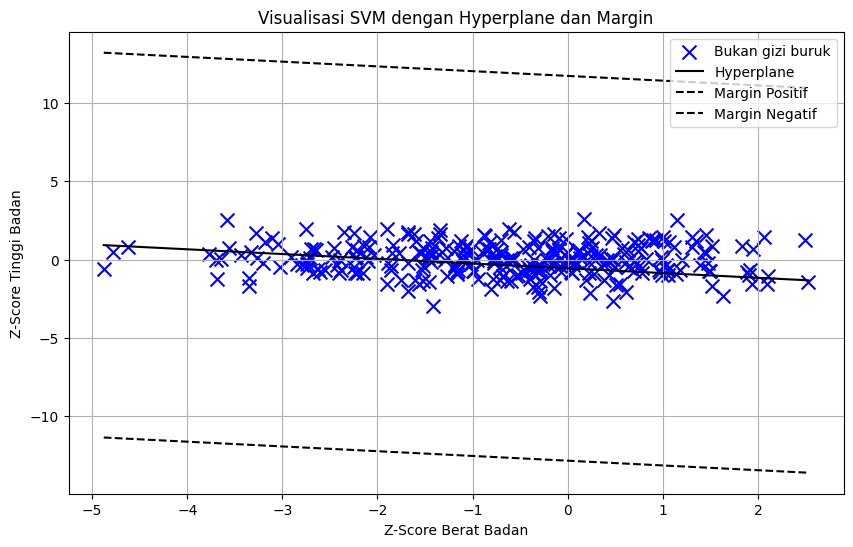

In [37]:
import matplotlib.pyplot as plt

# Fungsi untuk memplot hyperplane, margin, dan data
def plot_svm_boundary(X, y, w, b, feature_names):
    plt.figure(figsize=(10, 6))
    
    # Plot data
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(X[i][0], X[i][1], s=100, marker='o', color='r', edgecolors='k', label='Gizi buruk' if i == 0 else "")
        else:
            plt.scatter(X[i][0], X[i][1], s=100, marker='x', color='b', edgecolors='k', label='Bukan gizi buruk' if i == 0 else "")
    
    # Plot hyperplane
    x0 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x1 = -(w[0] * x0 + b) / w[1]
    plt.plot(x0, x1, '-k', label='Hyperplane')
    
    # Plot margins
    margin = 1 / np.linalg.norm(w)
    x1_margin_pos = x1 + margin / np.sqrt(1 + w[0]**2 / w[1]**2)
    x1_margin_neg = x1 - margin / np.sqrt(1 + w[0]**2 / w[1]**2)
    plt.plot(x0, x1_margin_pos, '--k', label='Margin Positif')
    plt.plot(x0, x1_margin_neg, '--k', label='Margin Negatif')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Visualisasi SVM dengan Hyperplane dan Margin')
    plt.legend()
    plt.grid(True)
    plt.show()

# Mengambil dua fitur untuk visualisasi sederhana
# Misalkan kita pilih 'Z-Score Berat Badan' dan 'Z-Score Tinggi Badan'
X_vis = X[:, [6, 7]]  # Kolom 6 dan 7 sesuai dengan indeks fitur yang relevan
y_vis = y
feature_names = ['Z-Score Berat Badan', 'Z-Score Tinggi Badan']  # Nama fitur

# Menampilkan plot
plot_svm_boundary(X_vis, y_vis, w, b, feature_names)


C:\Users\Hizamrul\AppData\Local\Temp\ipykernel_12084\3856158295.py:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset['Berat Badan Saat Ini (kg)'], subset['Nilai SVM'],


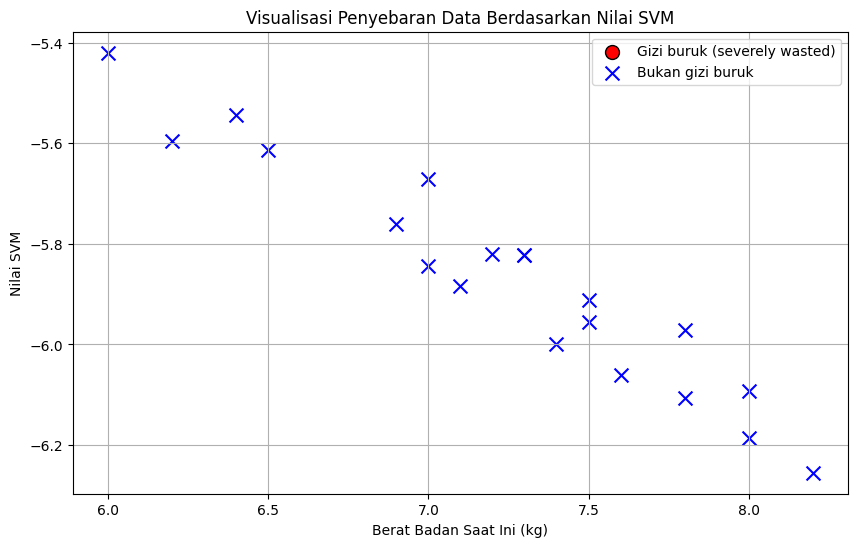

In [38]:

plt.figure(figsize=(10, 6))

# Plot data
colors = {'Gizi buruk (severely wasted)': 'red', 'Bukan gizi buruk': 'blue'}
markers = {'Gizi buruk (severely wasted)': 'o', 'Bukan gizi buruk': 'x'}

for status in colors.keys():
    subset = data_dummy[data_dummy['Prediksi Status Gizi'] == status]
    plt.scatter(subset['Berat Badan Saat Ini (kg)'], subset['Nilai SVM'], 
                color=colors[status], marker=markers[status], s=100, edgecolors='k', label=status)

plt.xlabel('Berat Badan Saat Ini (kg)')
plt.ylabel('Nilai SVM')
plt.title('Visualisasi Penyebaran Data Berdasarkan Nilai SVM')
plt.legend()
plt.grid(True)
plt.show()
